In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import auc


In [49]:
prob = "PandaReacherDense"
window_size = 10
nb_episodes = 300


In [50]:
def compute_auc_and_std(data, nb_episodes):
    # data = np.load(filepath, allow_pickle=True)
    all_returns = data['episode_rewards']  # shape: (n_seeds, n_episodes)
    # print("all_returns ", all_returns, "\n")
    
    # print("all_returns shape:", all_returns.shape, "\n")
    aucs = []
    for rewards in all_returns:
        returns = rewards[:nb_episodes]
        x = np.arange(len(returns))
        aucs.append(auc(x, returns))

    auc_mean = np.mean(aucs)
    auc_std = np.std(aucs)
    return auc_mean, auc_std



In [51]:
base_path = f"C:\\Users\\nicle\\Desktop\\QRNN-MPC\\Files\\Results\\{prob}"



QRNN_ASGNN: AUC = -206.50 ± 165.12
QRNN_basic: AUC = -141.42 ± 72.11
QRNN_random: AUC = -144.88 ± 62.97
QRNN_RS: AUC = -254.06 ± 57.74
QRNN_ASGNN_CEM: AUC = -265.53 ± 98.01
QRNN_basic_CEM: AUC = -286.73 ± 117.84
QRNN_random_CEM: AUC = -188.39 ± 52.07
QRNN_EvoCEM: AUC = -1013.46 ± 231.05
50NN_ASGNN: AUC = -117.50 ± 45.69
50NN_basic: AUC = -9736.58 ± 964.17
50NN_random: AUC = -158.73 ± 85.41
50NN_RS: AUC = -240.36 ± 60.94
50NN_ASGNN_CEM: AUC = -269.78 ± 95.25
50NN_basic_CEM: AUC = -8985.52 ± 1614.02
50NN_random_CEM: AUC = -187.91 ± 55.77
50NN_EvoCEM: AUC = -977.21 ± 158.26
MSENN_ASGNN: AUC = -130.19 ± 46.99
MSENN_basic: AUC = -281.64 ± 258.12
MSENN_random: AUC = -248.87 ± 187.75
MSENN_RS: AUC = -267.65 ± 68.38
MSENN_ASGNN_CEM: AUC = -296.81 ± 125.70
MSENN_basic_CEM: AUC = -391.97 ± 149.99
MSENN_random_CEM: AUC = -207.02 ± 63.73
MSENN_EvoCEM: AUC = -1014.02 ± 146.51
A2C: AUC = -3338.66 ± 197.77
PPO: AUC = -3191.12 ± 115.24
DDPG: AUC = -2870.66 ± 305.19
SAC: AUC = -2927.82 ± 59.77
TD3: AUC

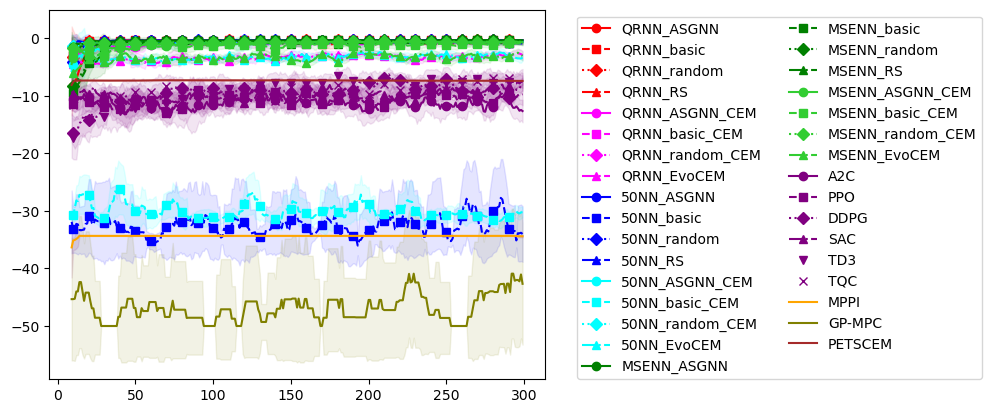

In [52]:
QRNN = {'QRNN_ASGNN': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    'QRNN_basic': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    'QRNN_random': f'{base_path}\\{prob}_MPC_QRNN_random_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    'QRNN_RS': f'{base_path}\\{prob}_RS_mid_QRNN_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',}
color = 'red'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

QRNN_CEM = {'QRNN_ASGNN_CEM': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_May21_CEM.npz',
                        # 'C:\Users\nicle\Desktop\QRNN-MPC\PandaReacher_MPC_QRNN_ASGNN_mid_May12_CEM.npz'
    'QRNN_basic_CEM': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_May21_CEM.npz',
    'QRNN_random_CEM': f'{base_path}\\{prob}_MPC_QRNN_random_mid_May21_CEM.npz',
    'QRNN_EvoCEM': f"{base_path}\\{prob}_MPC_QRNN_EvoCEM_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz",}
color = 'magenta'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ####################################################
FiftyNN = {'50NN_ASGNN': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    '50NN_basic': f'{base_path}\\{prob}_MPC_50NN_basic_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    '50NN_random': f'{base_path}\\{prob}_MPC_50NN_random_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    '50NN_RS': f'{base_path}\\{prob}_RS_mid_50NN_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',}
color = 'blue'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

FiftyNN_CEM = {'50NN_ASGNN_CEM': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_May21_CEM.npz',
    '50NN_basic_CEM': f'{base_path}\\{prob}_MPC_50NN_basic_mid_May21_CEM.npz',
    '50NN_random_CEM': f'{base_path}\\{prob}_MPC_50NN_random_mid_May21_CEM.npz',
    '50NN_EvoCEM': f"{base_path}\\{prob}_MPC_50NN_EvoCEM_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz",
}
color = 'aqua'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# ####################################################
MSENN = {'MSENN_ASGNN': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    'MSENN_basic': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    'MSENN_random': f'{base_path}\\{prob}_MPC_MSENN_random_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    'MSENN_RS': f'{base_path}\\{prob}_RS_mid_MSENN_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',}
color = 'green'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

MSENN_CEM = {'MSENN_ASGNN_CEM': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_May21_CEM.npz',
    'MSENN_basic_CEM': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May21_CEM.npz',
    'MSENN_random_CEM': f'{base_path}\\{prob}_MPC_MSENN_random_mid_May21_CEM.npz',
    'MSENN_EvoCEM': f"{base_path}\\{prob}_MPC_MSENN_EvoCEM_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz",}
color = 'limegreen'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# # ####################################################
# DQN_methods = {'DQN': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DQN_results.npz',
#     'IV-DQN': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_IV_DQN_results.npz',
#     'QR-DQN': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_QR_DQN_results.npz',
#     }

# color = 'black'
# # Assign markers and linestyles to sub-methods
# markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
# it = 0
# for label, filepath in DQN_methods.items():
#     data = np.load(filepath)
#     mean_rewards = data['mean_rewards'][:300]
#     std_rewards = data['std_rewards'][:300]

#     # if it == 0:
#     #     print(mean_rewards)
#     #     print(std_rewards)
    
#     # Smooth the data
#     smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
#     smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
#     # Plot
#     plt.plot(smoothed_mean, 
#              label=f"{label}", 
#              color=color,
#              marker=markers[it],
#              linestyle=linestyles[it],
#              markevery=10)  # Show markers every 10 points
    
#     # Confidence interval (optional)
#     plt.fill_between(range(len(mean_rewards)), 
#                      smoothed_mean - smoothed_std, 
#                      smoothed_mean + smoothed_std, 
#                      color='red', alpha=0.1)
#     it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################
RL_methods = {'A2C': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_A2C_results.npz',
    'PPO': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_PPO_results.npz',
    'DDPG': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_DDPG_results.npz',
    'SAC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_SAC_results.npz',
    'TD3': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_TD3_results.npz',
    'TQC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_TQC_results.npz',
    
    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
    # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
    # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
    # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
    # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
    }

color = 'purple'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', ' ', '', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in RL_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1

########################
prob_Control = "PandaReach"
Control_methods = {'MPPI': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\MPPI\\{prob_Control}_MPPI_results.npz',
    'GPMPC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\GP_MPC\\{prob_Control}_GP-MPC_results.npz',
    # 'iLQR': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\ilqr_s\\{prob_RL}_iLQR_results.npz',
    # 'iLQR': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\ilqr\\{prob_RL}_iLQR_results.npz',
    'PETSCEM': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\PETS\\{prob}_PETS_CEM_results.npz',

    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
    # # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
    # # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
    # # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
    # # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
    }

color_MPPI = 'orange'
color_GPMPC = 'Olive'
color_iLQR = 'blueviolet'
color_PETSCEM = 'brown'

MPPI_data = np.load(Control_methods['MPPI'])
mean_returns_MPPI = MPPI_data['mean_rewards'][:nb_episodes]
std_returns_MPPI = MPPI_data['std_rewards'][:nb_episodes]
# Smooth the data
smoothed_mean_MPPI = pd.Series(mean_returns_MPPI).rolling(window=window_size).mean()
smoothed_std_MPPI = pd.Series(std_returns_MPPI).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(MPPI_data, nb_episodes)
print(f"MPPI: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

GPMPC_data = np.load(Control_methods['GPMPC'])
mean_returns_GPMPC = GPMPC_data['mean_rewards'][:nb_episodes]
std_returns_GPMPC = GPMPC_data['std_rewards'][:nb_episodes]
# Smooth the data
smoothed_mean_GPMPC = pd.Series(mean_returns_GPMPC).rolling(window=window_size).mean()
smoothed_std_GPMPC = pd.Series(std_returns_GPMPC).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(GPMPC_data, nb_episodes)
print(f"GP-MPC: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# iLQR_data = np.load(Control_methods['iLQR'])
# mean_returns_iLQR = iLQR_data['mean_rewards'][:300]
# std_returns_iLQR = iLQR_data['std_rewards'][:300]
# # Smooth the data
# smoothed_mean_iLQR = pd.Series(mean_returns_iLQR).rolling(window=window_size).mean()
# smoothed_std_iLQR = pd.Series(std_returns_iLQR).rolling(window=window_size).std()

PETSCEM_data = np.load(Control_methods['PETSCEM'])
mean_returns_PETSCEM = PETSCEM_data['mean_rewards'][:300]
std_returns_PETSCEM = PETSCEM_data['std_rewards'][:300]
# Smooth the data
smoothed_mean_PETSCEM = pd.Series(mean_returns_PETSCEM).rolling(window=window_size).mean()
smoothed_std_PETSCEM = pd.Series(std_returns_PETSCEM).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(PETSCEM_data, nb_episodes)
print(f"PETS-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

plt.plot(smoothed_mean_MPPI, label='MPPI', color='orange')
plt.fill_between(range(len(smoothed_mean_MPPI)), 
                 smoothed_mean_MPPI - smoothed_std_MPPI, 
                 smoothed_mean_MPPI + smoothed_std_MPPI, 
                 color='purple', alpha=0.1)
plt.plot(smoothed_mean_GPMPC, label='GP-MPC', color=color_GPMPC)
plt.fill_between(range(len(smoothed_mean_GPMPC)), 
                 smoothed_mean_GPMPC - smoothed_std_GPMPC, 
                 smoothed_mean_GPMPC + smoothed_std_GPMPC, 
                 color=color_GPMPC, alpha=0.1)
# plt.plot(smoothed_mean_iLQR, label='iLQR', color=color_iLQR)
# plt.fill_between(range(len(smoothed_mean_iLQR)), 
#                  smoothed_mean_iLQR - smoothed_std_iLQR, 
#                  smoothed_mean_iLQR + smoothed_std_iLQR, 
#                  color=color_iLQR, alpha=0.1)
plt.plot(smoothed_mean_PETSCEM, label='PETSCEM', color=color_PETSCEM)
plt.fill_between(range(len(smoothed_mean_PETSCEM)), 
                 smoothed_mean_PETSCEM - smoothed_std_PETSCEM, 
                 smoothed_mean_PETSCEM + smoothed_std_PETSCEM, 
                 color=color_PETSCEM, alpha=0.1)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)


### Plot subfigures



QRNN_ASGNN: AUC = -206.50 ± 165.12
QRNN_basic: AUC = -141.42 ± 72.11
QRNN_random: AUC = -144.88 ± 62.97
QRNN_RS: AUC = -254.06 ± 57.74
50NN_ASGNN: AUC = -117.50 ± 45.69
50NN_basic: AUC = -9736.58 ± 964.17
50NN_random: AUC = -158.73 ± 85.41
50NN_RS: AUC = -240.36 ± 60.94
MSENN_ASGNN: AUC = -130.19 ± 46.99
MSENN_basic: AUC = -281.64 ± 258.12
MSENN_random: AUC = -248.87 ± 187.75
MSENN_RS: AUC = -267.65 ± 68.38
############################################################# 

QRNN_ASGNN_CEM: AUC = -265.53 ± 98.01
QRNN_basic_CEM: AUC = -286.73 ± 117.84
QRNN_random_CEM: AUC = -188.39 ± 52.07
QRNN_EvoCEM: AUC = -1013.46 ± 231.05
50NN_ASGNN_CEM: AUC = -269.78 ± 95.25
50NN_basic_CEM: AUC = -8985.52 ± 1614.02
50NN_random_CEM: AUC = -187.91 ± 55.77
50NN_EvoCEM: AUC = -977.21 ± 158.26
MSENN_ASGNN_CEM: AUC = -296.81 ± 125.70
MSENN_basic_CEM: AUC = -391.97 ± 149.99
MSENN_random_CEM: AUC = -207.02 ± 63.73
MSENN_EvoCEM: AUC = -1014.02 ± 146.51
############################################################

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\Files\\Results\\PandaReacherDense\\PandaReacherDense_MPC_50NN_ASGNN_mid_April2_1000_StepsPerEpisodeContLLepisodes_results.npz'

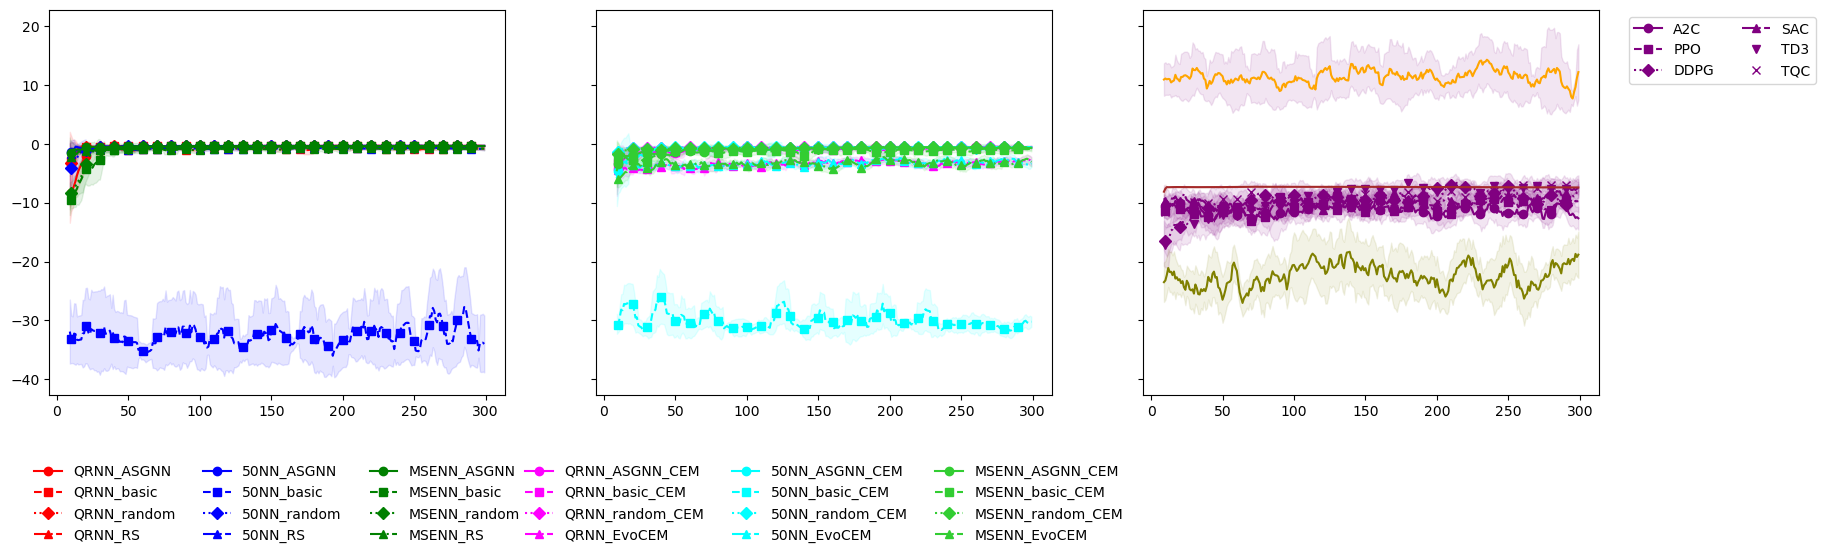

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=True)

QRNN = {'QRNN_ASGNN': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    'QRNN_basic': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    'QRNN_random': f'{base_path}\\{prob}_MPC_QRNN_random_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    'QRNN_RS': f'{base_path}\\{prob}_RS_mid_QRNN_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',}
color = 'red'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

FiftyNN = {'50NN_ASGNN': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    '50NN_basic': f'{base_path}\\{prob}_MPC_50NN_basic_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    '50NN_random': f'{base_path}\\{prob}_MPC_50NN_random_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    '50NN_RS': f'{base_path}\\{prob}_RS_mid_50NN_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',}
color = 'blue'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

MSENN = {'MSENN_ASGNN': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    'MSENN_basic': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    'MSENN_random': f'{base_path}\\{prob}_MPC_MSENN_random_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',
    'MSENN_RS': f'{base_path}\\{prob}_RS_mid_MSENN_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',}
color = 'green'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

# from matplotlib.lines import Line2D

# custom_legend = [
#     Line2D([0], [0], color='red', lw=2, label='QRNN'),
#     Line2D([0], [0], color='blue', lw=2, label='50NN'),
#     Line2D([0], [0], color='green', lw=2, label='MSENN'),
#     Line2D([0], [0], color='black', marker='o', linestyle='None', markersize=6, label='ASGNN'),
#     Line2D([0], [0], color='black', marker='s', linestyle='None', markersize=6, label='QRNN-CEM'),
#     Line2D([0], [0], color='black', marker='^', linestyle='None', markersize=6, label='50NN-CEM')
# ]

# axs[0].legend(handles=custom_legend, loc='upper center', bbox_to_anchor=(0.5, -0.2),
#               ncol=3, fontsize=10, frameon=False)


###########################################################

print("############################################################# \n")

QRNN_CEM = {'QRNN_ASGNN_CEM': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_May21_CEM.npz',
                        # 'C:\Users\nicle\Desktop\QRNN-MPC\PandaReacher_MPC_QRNN_ASGNN_mid_May12_CEM.npz'
    'QRNN_basic_CEM': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_May21_CEM.npz',
    'QRNN_random_CEM': f'{base_path}\\{prob}_MPC_QRNN_random_mid_May21_CEM.npz',
    'QRNN_EvoCEM': f"{base_path}\\{prob}_MPC_QRNN_EvoCEM_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz",}
color = 'magenta'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################################################

FiftyNN_CEM = {'50NN_ASGNN_CEM': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_May21_CEM.npz',
    '50NN_basic_CEM': f'{base_path}\\{prob}_MPC_50NN_basic_mid_May21_CEM.npz',
    '50NN_random_CEM': f'{base_path}\\{prob}_MPC_50NN_random_mid_May21_CEM.npz',
    '50NN_EvoCEM': f"{base_path}\\{prob}_MPC_50NN_EvoCEM_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz",
}
color = 'aqua'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


########################################################

MSENN_CEM = {'MSENN_ASGNN_CEM': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_May21_CEM.npz',
    'MSENN_basic_CEM': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May21_CEM.npz',
    'MSENN_random_CEM': f'{base_path}\\{prob}_MPC_MSENN_random_mid_May21_CEM.npz',
    'MSENN_EvoCEM': f"{base_path}\\{prob}_MPC_MSENN_EvoCEM_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz",}
color = 'limegreen'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

#############################################################

print("############################################################# \n")

# DQN_methods = {'DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_DQN_results.npz',
#     'IV-DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_IV_DQN_results.npz',
#     'QR-DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_QR_DQN_results.npz',
#     }

# color = 'black'
# # Assign markers and linestyles to sub-methods
# markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
# it = 0
# for label, filepath in DQN_methods.items():
#     data = np.load(filepath)
#     mean_rewards = data['mean_rewards'][:nb_episodes]
#     std_rewards = data['std_rewards'][:nb_episodes]
    
#     # print("mean_rewards ", data['ep[]'], "\n")
#     auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
#     print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

#     # if it == 0:
#     #     print(mean_rewards)
#     #     print(std_rewards)
    
#     # Smooth the data
#     smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
#     smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
#     # Plot
#     axs[2].plot(smoothed_mean, 
#              label=f"{label}", 
#              color=color,
#              marker=markers[it],
#              linestyle=linestyles[it],
#              markevery=10)  # Show markers every 10 points
    
#     # Confidence interval (optional)
#     axs[2].fill_between(range(len(mean_rewards)), 
#                      smoothed_mean - smoothed_std, 
#                      smoothed_mean + smoothed_std, 
#                      color=color, alpha=0.1)
#     it += 1
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################
RL_methods = {'A2C': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_A2C_results.npz',
    'PPO': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_PPO_results.npz',
    'DDPG': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_DDPG_results.npz',
    'SAC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_SAC_results.npz',
    'TD3': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_TD3_results.npz',
    'TQC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_TQC_results.npz',
    
    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
    # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
    # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
    # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
    # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
    }

color = 'purple'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', ' ', '', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in RL_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[2].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[2].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

##################################################

########################
prob_Control = "PandaReachDense"
Control_methods = {'MPPI': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\MPPI\\{prob_Control}_MPPI_results.npz',
    'GPMPC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\GP_MPC\\{prob_Control}_GP-MPC_results.npz',
    # 'iLQR': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\ilqr_s\\{prob_RL}_iLQR_results.npz',
    # 'iLQR': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\ilqr\\{prob_RL}_iLQR_results.npz',
    'PETSCEM': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\PETS\\{prob}_PETS_CEM_results.npz',
    # C:\Users\nicle\Desktop\QRNN-MPC\PETS\PandaReacherDense_PETS_results.npz

    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
    # # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
    # # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
    # # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
    # # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
    }

color_MPPI = 'orange'
color_GPMPC = 'Olive'
color_iLQR = 'blueviolet'
color_PETSCEM = 'brown'

MPPI_data = np.load(Control_methods['MPPI'])
mean_returns_MPPI = MPPI_data['mean_rewards'][:nb_episodes]
std_returns_MPPI = MPPI_data['std_rewards'][:nb_episodes]

# Smooth the data
smoothed_mean_MPPI = pd.Series(mean_returns_MPPI).rolling(window=window_size).mean()
smoothed_std_MPPI = pd.Series(std_returns_MPPI).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(MPPI_data, nb_episodes)
print(f"MPPI: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

GPMPC_data = np.load(Control_methods['GPMPC'])
mean_returns_GPMPC = GPMPC_data['mean_rewards'][:nb_episodes]
std_returns_GPMPC = GPMPC_data['std_rewards'][:nb_episodes]
# Smooth the data
smoothed_mean_GPMPC = pd.Series(mean_returns_GPMPC).rolling(window=window_size).mean()
smoothed_std_GPMPC = pd.Series(std_returns_GPMPC).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(GPMPC_data, nb_episodes)
print(f"GP-MPC: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# iLQR_data = np.load(Control_methods['iLQR'])
# mean_returns_iLQR = iLQR_data['mean_rewards'][:300]
# std_returns_iLQR = iLQR_data['std_rewards'][:300]
# # Smooth the data
# smoothed_mean_iLQR = pd.Series(mean_returns_iLQR).rolling(window=window_size).mean()
# smoothed_std_iLQR = pd.Series(std_returns_iLQR).rolling(window=window_size).std()

PETSCEM_data = np.load(Control_methods['PETSCEM'])
mean_returns_PETSCEM = PETSCEM_data['mean_rewards'][:nb_episodes]
std_returns_PETSCEM = PETSCEM_data['std_rewards'][:nb_episodes]
# Smooth the data
smoothed_mean_PETSCEM = pd.Series(mean_returns_PETSCEM).rolling(window=window_size).mean()
smoothed_std_PETSCEM = pd.Series(std_returns_PETSCEM).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(PETSCEM_data, nb_episodes)
print(f"PETS-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

plt.plot(smoothed_mean_MPPI, label='MPPI', color='orange')
plt.fill_between(range(len(smoothed_mean_MPPI)), 
                 smoothed_mean_MPPI - smoothed_std_MPPI, 
                 smoothed_mean_MPPI + smoothed_std_MPPI, 
                 color='purple', alpha=0.1)
plt.plot(smoothed_mean_GPMPC, label='GP-MPC', color=color_GPMPC)
plt.fill_between(range(len(smoothed_mean_GPMPC)), 
                 smoothed_mean_GPMPC - smoothed_std_GPMPC, 
                 smoothed_mean_GPMPC + smoothed_std_GPMPC, 
                 color=color_GPMPC, alpha=0.1)
# plt.plot(smoothed_mean_iLQR, label='iLQR', color=color_iLQR)
# plt.fill_between(range(len(smoothed_mean_iLQR)), 
#                  smoothed_mean_iLQR - smoothed_std_iLQR, 
#                  smoothed_mean_iLQR + smoothed_std_iLQR, 
#                  color=color_iLQR, alpha=0.1)
plt.plot(smoothed_mean_PETSCEM, label='PETSCEM', color=color_PETSCEM)
plt.fill_between(range(len(smoothed_mean_PETSCEM)), 
                 smoothed_mean_PETSCEM - smoothed_std_PETSCEM, 
                 smoothed_mean_PETSCEM + smoothed_std_PETSCEM, 
                 color=color_PETSCEM, alpha=0.1)



##################################################
markers = ['o', 's', 'D', '^', 'v', 'x', '*']
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns

# 50NN_ASGNN
color_50NN_ASGNN_CEM = 'blue'
marker_50NN_ASGNN_CEM = markers[0]
linestyle_50NN_ASGNN_CEM = linestyles[0]
data = np.load(f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_April2_1000_StepsPerEpisodeContLLepisodes_results.npz')
mean_rewards_50NN_ASGNN_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_50NN_ASGNN_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_50NN_ASGNN_CEM = pd.Series(mean_rewards_50NN_ASGNN_CEM).rolling(window=window_size).mean()
smoothed_std_50NN_ASGNN_CEM = pd.Series(std_rewards_50NN_ASGNN_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_50NN_ASGNN_CEM, 
            label="50NN_ASGNN_CEM", 
            color=color_50NN_ASGNN_CEM,
            marker=marker_50NN_ASGNN_CEM,
            linestyle=linestyle_50NN_ASGNN_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_50NN_ASGNN_CEM)), 
                    smoothed_mean_50NN_ASGNN_CEM - smoothed_std_50NN_ASGNN_CEM, 
                    smoothed_mean_50NN_ASGNN_CEM + smoothed_std_50NN_ASGNN_CEM, 
                    color=color_50NN_ASGNN_CEM, alpha=0.1)


# QRNN_basic
color_QRNN_basic = 'red'
marker_QRNN_basic = markers[1]
linestyle_QRNN_basic = linestyles[1]
data = np.load(f'{base_path}\\{prob}_MPC_QRNN_basic_mid_April2_1000_StepsPerEpisodeContLLepisodes_results_test.npz',)
mean_rewards_QRNN_basic = data['mean_rewards'][:nb_episodes]
std_rewards_QRNN_basic = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_QRNN_basic_CEM = pd.Series(mean_rewards_QRNN_basic_CEM).rolling(window=window_size).mean()
smoothed_std_QRNN_basic_CEM = pd.Series(std_rewards_QRNN_basic_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_QRNN_basic_CEM, 
            label="QRNN_basic", 
            color=color_QRNN_basic_CEM,
            marker=marker_QRNN_basic_CEM,
            linestyle=linestyle_QRNN_basic_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_QRNN_basic_CEM)), 
                    smoothed_mean_QRNN_basic_CEM - smoothed_std_QRNN_basic_CEM, 
                    smoothed_mean_QRNN_basic_CEM + smoothed_std_QRNN_basic_CEM, 
                    color=color_QRNN_basic_CEM, alpha=0.1)

# MSENN_ASGNN
color_MSENN_ASGNN_CEM = 'blue'
marker_MSENN_ASGNN_CEM = markers[0]
linestyle_MSENN_ASGNN_CEM = linestyles[0]
data = np.load(f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_April2_1000_StepsPerEpisodeContLLepisodes_results.npz')
mean_rewards_MSENN_ASGNN_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_MSENN_ASGNN_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_MSENN_ASGNN_CEM = pd.Series(mean_rewards_MSENN_ASGNN_CEM).rolling(window=window_size).mean()
smoothed_std_MSENN_ASGNN_CEM = pd.Series(std_rewards_MSENN_ASGNN_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_MSENN_ASGNN_CEM, 
            label="MSENN_ASGNN_CEM", 
            color=color_MSENN_ASGNN_CEM,
            marker=marker_MSENN_ASGNN_CEM,
            linestyle=linestyle_MSENN_ASGNN_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_MSENN_ASGNN_CEM)), 
                    smoothed_mean_MSENN_ASGNN_CEM - smoothed_std_MSENN_ASGNN_CEM, 
                    smoothed_mean_MSENN_ASGNN_CEM + smoothed_std_MSENN_ASGNN_CEM, 
                    color=color_MSENN_ASGNN_CEM, alpha=0.1)



# axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)
axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

